### **와인 데이터 분류**

In [176]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'wine.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [177]:
# 결측치 확인
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [178]:
# 레이블 데이터 확인
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [181]:
# 피처, 레이블 데이터 나누기
X = df.drop('Wine', axis = 1).values
y = df['Wine'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [182]:
# 훈련, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### **결정트리**

In [183]:
# 모델생성
dt_clf = DecisionTreeClassifier()

In [184]:
# 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도 {:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('결정트리 오차행렬')
print(confusion_matrix(y_test, dt_pred))

결정트리 정확도 0.9444
결정트리 오차행렬
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


In [185]:
# 하이터파라미터 튜닝
param_grid = {
    'max_depth': [3, 5, 10, None],  # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],  # 최소 샘플 분할 기준
    'min_samples_leaf': [1, 2, 5],  # 리프 노드 최소 샘플 수
    'criterion': ['gini', 'entropy']  # 불순도 계산 방식
}

In [186]:
# 그리드 서치 실행 (5-Fold 교차 검증)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # 모델 학습

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적 모델 평가
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("테스트 데이터 정확도:", test_score)

최적의 하이퍼파라미터: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도: 0.9224137931034484
테스트 데이터 정확도: 0.9444444444444444


In [187]:
# 모델 재생성
params = {
    'criterion': 'gini',
    'max_depth': 3,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# 결정트리 모델 생성
dt_clt = DecisionTreeClassifier(**params)

In [188]:
# 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도 {:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('결정트리 오차행렬')
print(confusion_matrix(y_test, dt_pred))

결정트리 정확도 0.9444
결정트리 오차행렬
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


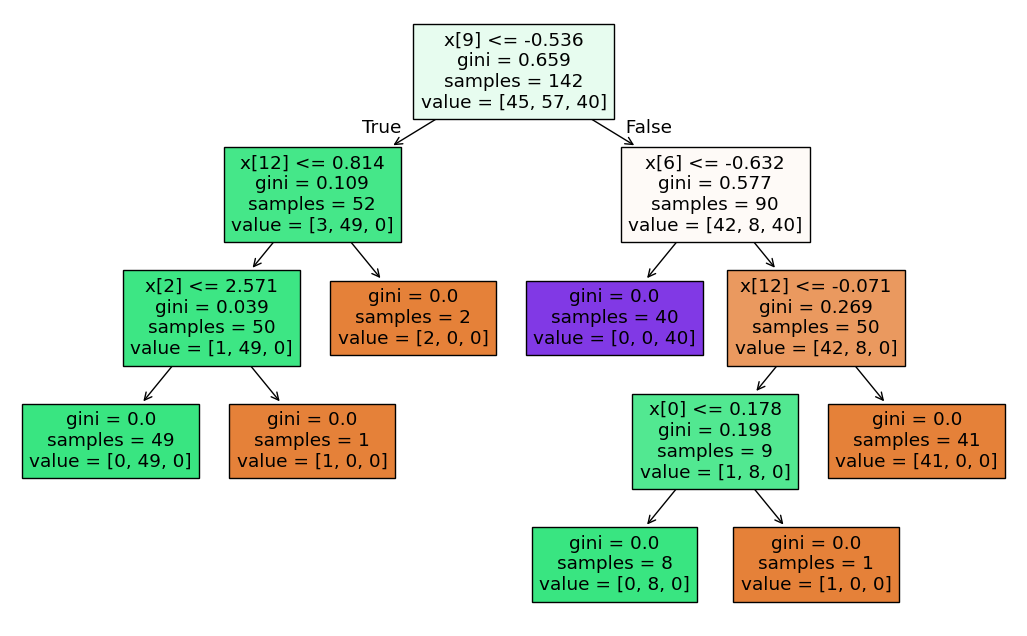

In [189]:
import matplotlib.pyplot as plt

# 결정트리 시각화
plt.figure(figsize = (13, 8))
plot_tree(dt_clf, filled = True)
plt.show()

### **랜덤 포레스트**

In [190]:
# 모델 생성
rf_clf = RandomForestClassifier()

In [191]:
# 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도 {:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('랜덤 포레스트 오차행렬')
print(confusion_matrix(y_test, rf_pred))

랜덤 포레스트 정확도 1.0000
랜덤 포레스트 오차행렬
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### **로지스티 회귀**

In [192]:
# 모델 생성
lr_clf = LogisticRegression()

In [193]:
# 학습 / 예측 / 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도 {:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('로지스틱 회귀 오차행렬')
print(confusion_matrix(y_test, lr_pred))

로지스틱 회귀 정확도 1.0000
로지스틱 회귀 오차행렬
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### **KNN**

In [194]:
# 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [195]:
# 학습 / 예측 / 평가
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('KNN 정확도 {:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN 오차행렬')
print(confusion_matrix(y_test, knn_pred))

KNN 정확도 0.9444
KNN 오차행렬
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [196]:
# 하이퍼 파라미터 튜닝
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [197]:
# 그리드 서치 설정 (5-Fold 교차 검증)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)  # 학습 수행

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [198]:
# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적 모델 평가
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("테스트 데이터 정확도:", test_score)

최적의 하이퍼파라미터: {'n_neighbors': 5}
최고 정확도: 0.9578817733990148
테스트 데이터 정확도: 0.9444444444444444


In [199]:
# 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors = 5)

In [200]:
# 학습 / 예측 / 평가
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('KNN 정확도 {:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN 오차행렬')
print(confusion_matrix(y_test, knn_pred))

KNN 정확도 0.9444
KNN 오차행렬
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


### **딥러닝**

In [201]:
# 원핫 인코딩
Y = pd.get_dummies(y)

In [202]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [203]:
X.shape

(178, 13)

In [204]:
Y

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
173,False,False,True
174,False,False,True
175,False,False,True
176,False,False,True


In [205]:
Y.shape

(178, 3)

In [214]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [207]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 30)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947 (3.70 KB)

 Trainable params: 947 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [209]:
# 모델 학습
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 500, batch_size = 10)

Epoch 1/500


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3981 - loss: 1.1273 - val_accuracy: 0.5862 - val_loss: 1.0507
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7019 - loss: 1.0588 - val_accuracy: 0.7586 - val_loss: 1.0127
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6963 - loss: 1.0098 - val_accuracy: 0.8621 - val_loss: 0.9654
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8288 - loss: 0.9472 - val_accuracy: 0.8966 - val_loss: 0.9106
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8872 - loss: 0.8944 - val_accuracy: 0.8621 - val_loss: 0.8510
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9338 - loss: 0.7825 - val_accuracy: 0.8621 - val_loss: 0.7838
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9404 - loss: 0.7006 - val_accuracy: 0.8621 - val_loss: 0.7190
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9166 - loss: 0.6634 - val_accuracy: 0.8621 - val_loss: 0.

In [210]:
import numpy as np

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis = 1)
y_pred_class = np.argmax(y_pred,axis = 1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024F304AE5C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


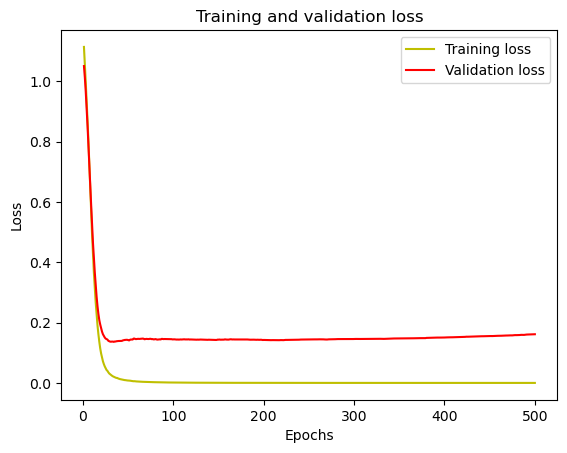

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

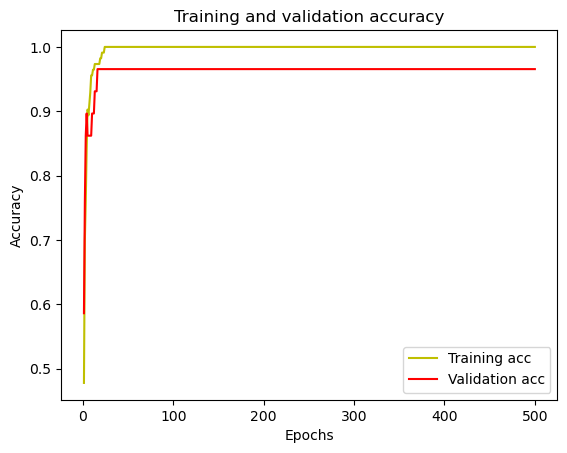

In [212]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [213]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.75      0.86        16
           2       0.75      1.00      0.86         6

    accuracy                           0.89        36
   macro avg       0.88      0.92      0.88        36
weighted avg       0.91      0.89      0.89        36

[[14  0  0]
 [ 2 12  2]
 [ 0  0  6]]
